In [85]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

filtered_adni = pd.read_csv('/work/home/nhkim/BiS495/data_f/filtered_adni.csv', index_col=0)
adni_label = pd.read_csv('/work/home/nhkim/BiS495/data_f/ADNI_label.csv')

filtered_anm1 = pd.read_csv('/work/home/nhkim/BiS495/data_f/filtered_anm1.csv', index_col=0)
anm1_label = pd.read_csv('/work/home/nhkim/BiS495/data_f/ANM1_label.csv')

filtered_anm2 = pd.read_csv('/work/home/nhkim/BiS495/data_f/filtered_anm2.csv', index_col=0)
anm2_label = pd.read_csv('/work/home/nhkim/BiS495/data_f/ANM2_label.csv')

In [86]:
filtered_labels_adni = adni_label[adni_label['diagnosis'].isin([1, 3])]
filtered_labels_anm1 = anm1_label[anm1_label['diagnosis'].isin([1, 3])]
filtered_labels_anm2 = anm2_label[anm2_label['diagnosis'].isin([1, 3])]

In [87]:
filtered_patients_adni = filtered_adni[filtered_labels_adni['id']]
filtered_patients_anm1 = filtered_anm1[filtered_labels_anm1['id']]
filtered_patients_anm2 = filtered_anm2[filtered_labels_anm2['id']]

In [88]:
combined_data = pd.concat([filtered_patients_adni, filtered_patients_anm1, filtered_patients_anm2], axis=1)
combined_labels = pd.concat([filtered_labels_adni.assign(dataset='ADNI'),
                             filtered_labels_anm1.assign(dataset='ANM1'),
                             filtered_labels_anm2.assign(dataset='ANM2')])

In [90]:
print(combined_data.shape)

(10025, 249)


In [133]:
combined_data = filtered_patients_adni

In [134]:
combined_labels = filtered_labels_adni.assign(dataset='ADNI')

In [135]:
pca = PCA(n_components=100)
pca_result = pca.fit_transform(combined_data.T)

In [136]:
print(pca_result.shape)

(199, 100)


In [137]:
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(pca_result)

In [138]:
tsne_df = pd.DataFrame(tsne_result, columns=['TS1', 'TS2'])
tsne_df['diagnosis'] = combined_labels['diagnosis'].values
tsne_df['dataset'] = combined_labels['dataset'].values

In [139]:
print(tsne_result.shape)

(199, 2)


In [140]:
fig = plt.figure(figsize=(14, 10))

<Figure size 1008x720 with 0 Axes>

In [141]:
colors = {
    ('ADNI', 1): 'blue',  # ADNI의 CT
    ('ADNI', 3): 'red',   # ADNI의 AD
    ('ANM1', 1): 'blue',  # ANM1의 CT
    ('ANM1', 3): 'red',   # ANM1의 AD
    ('ANM2', 1): 'blue',  # ANM2의 CT
    ('ANM2', 3): 'red'    # ANM2의 AD
}
markers = {1: 'o', 3: 's'}
labels = {
    ('ADNI', 1): 'CT', 
    ('ADNI', 3): 'AD', 
}
label_a = {
    1: 'CT', 3: 'AD'
}

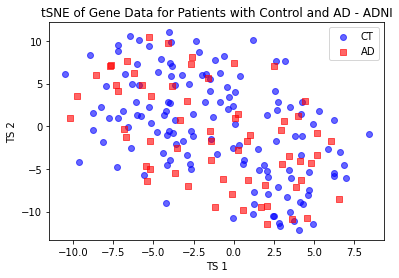

In [143]:
for (dataset, diagnosis) in labels.keys():
    subset = tsne_df[(tsne_df['dataset'] == dataset) & (tsne_df['diagnosis'] == diagnosis)]
    plt.scatter(subset['TS1'], subset['TS2'],
                color=colors[(dataset, diagnosis)], 
                marker=markers[diagnosis], 
                label=label_a[diagnosis], 
                alpha=0.6)

plt.title('tSNE of Gene Data for Patients with Control and AD - ADNI')
plt.xlabel('TS 1')
plt.ylabel('TS 2')
plt.legend()
plt.show()

In [62]:
colors = {'ADNI': 'blue', 'ANM1': 'green', 'ANM2': 'purple'}
markers = {1: 'o', 3: 's'}
labels = {
    ('ADNI', 1): 'adni_CT', 
    ('ADNI', 3): 'adni_AD', 
    ('ANM1', 1): 'anm1_CT', 
    ('ANM1', 3): 'anm1_AD', 
    ('ANM2', 1): 'anm2_CT', 
    ('ANM2', 3): 'anm2_AD'
}

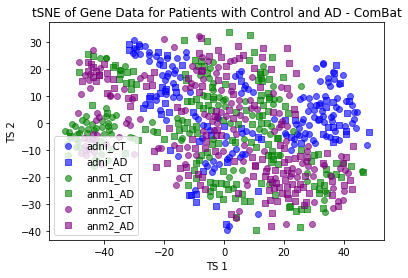

In [63]:
for (dataset, diagnosis) in labels.keys():
    subset = tsne_df[(tsne_df['dataset'] == dataset) & (tsne_df['diagnosis'] == diagnosis)]
    plt.scatter(subset['TS1'], subset['TS2'],
                color=colors[dataset], 
                marker=markers[diagnosis], 
                label=labels[(dataset, diagnosis)], 
                alpha=0.6)

plt.title('tSNE of Gene Data for Patients with Control and AD - ComBat')
plt.xlabel('TS 1')
plt.ylabel('TS 2')
plt.legend()
plt.show()